## **California**

In [41]:
import pandas as pd
import numpy as np
import folium
import seaborn as sns
import time
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import    RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from geopy.distance import geodesic
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import gc
import warnings
warnings.filterwarnings('ignore')

In [8]:
url='D:\Github-Time\Python-MachineLearning\Machine learning projects\Data\housing.csv'
df=pd.read_csv(url,sep=',')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [9]:
print('Número de filas :',df.shape[0])
print('Número de columnas :',df.shape[1])

Número de filas : 20640
Número de columnas : 10


In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<Axes: >

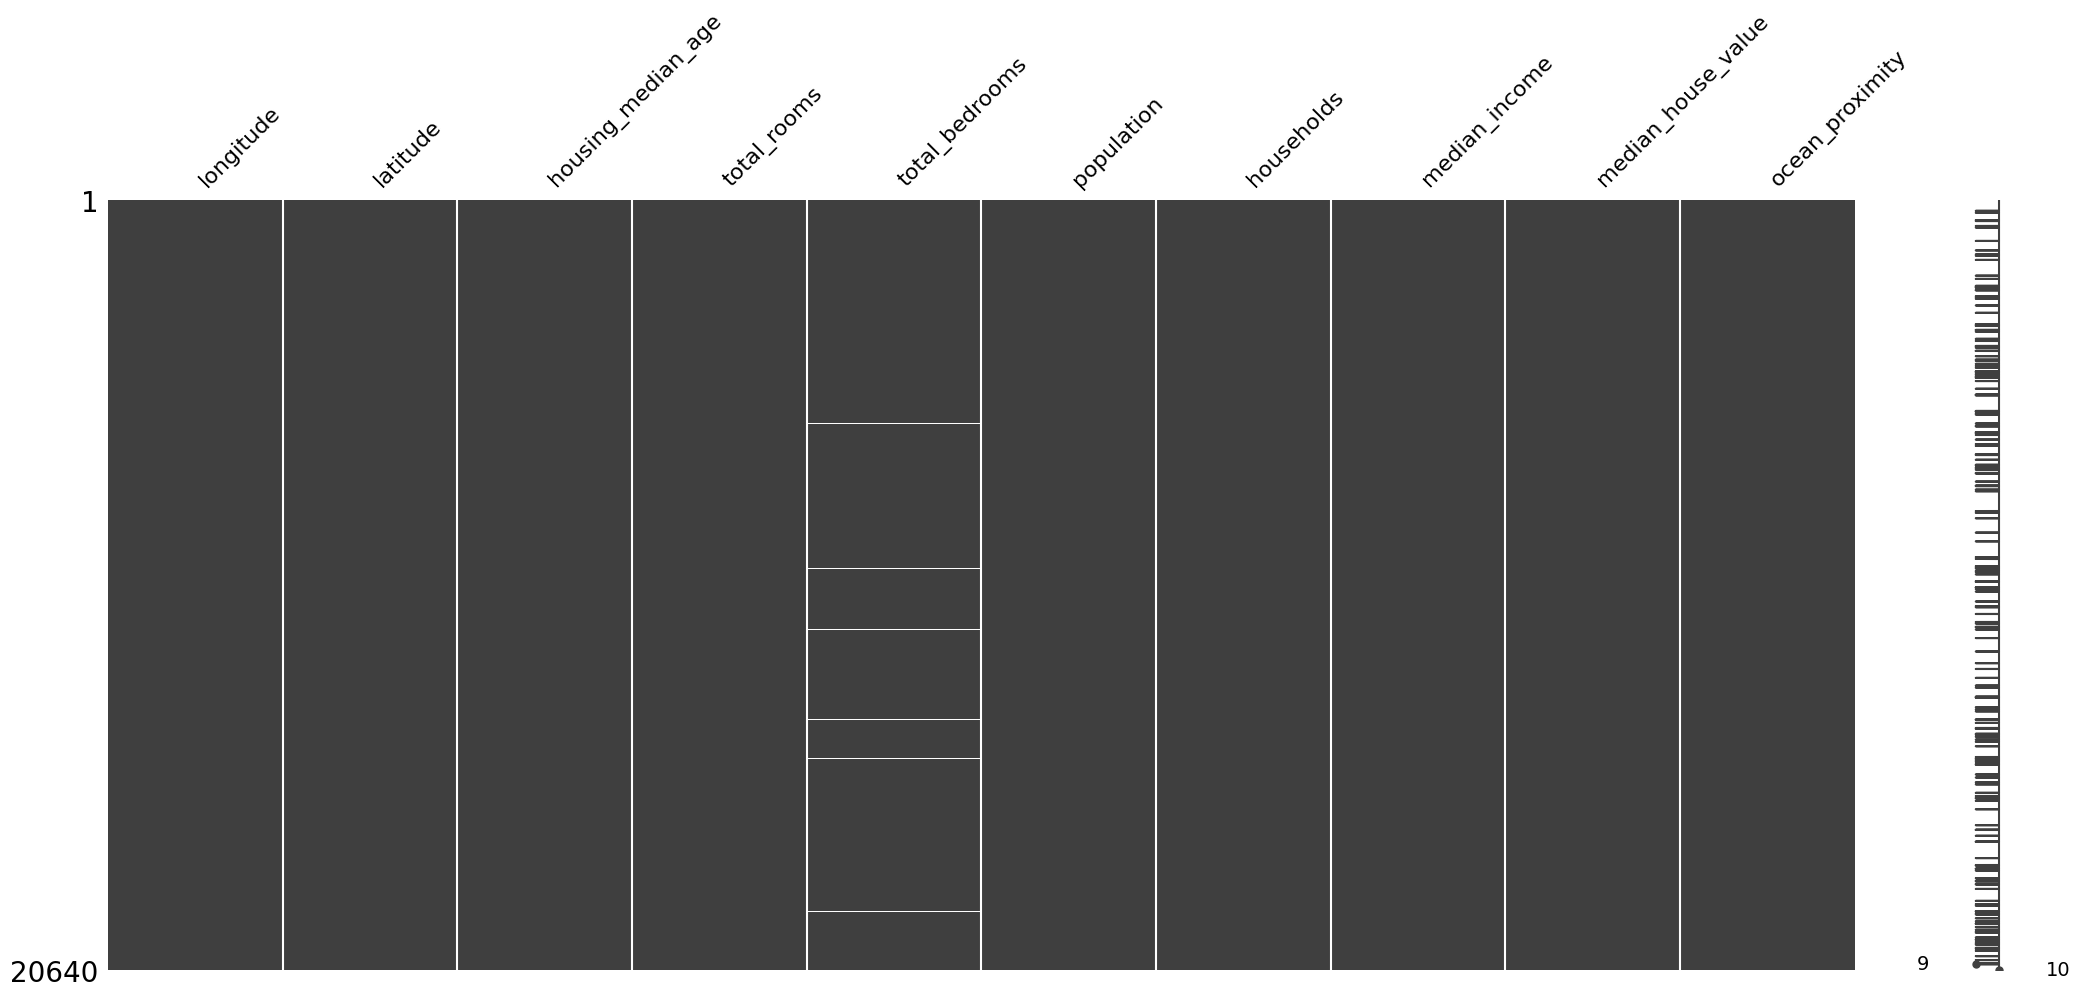

In [11]:
msno.matrix(df)

<Axes: >

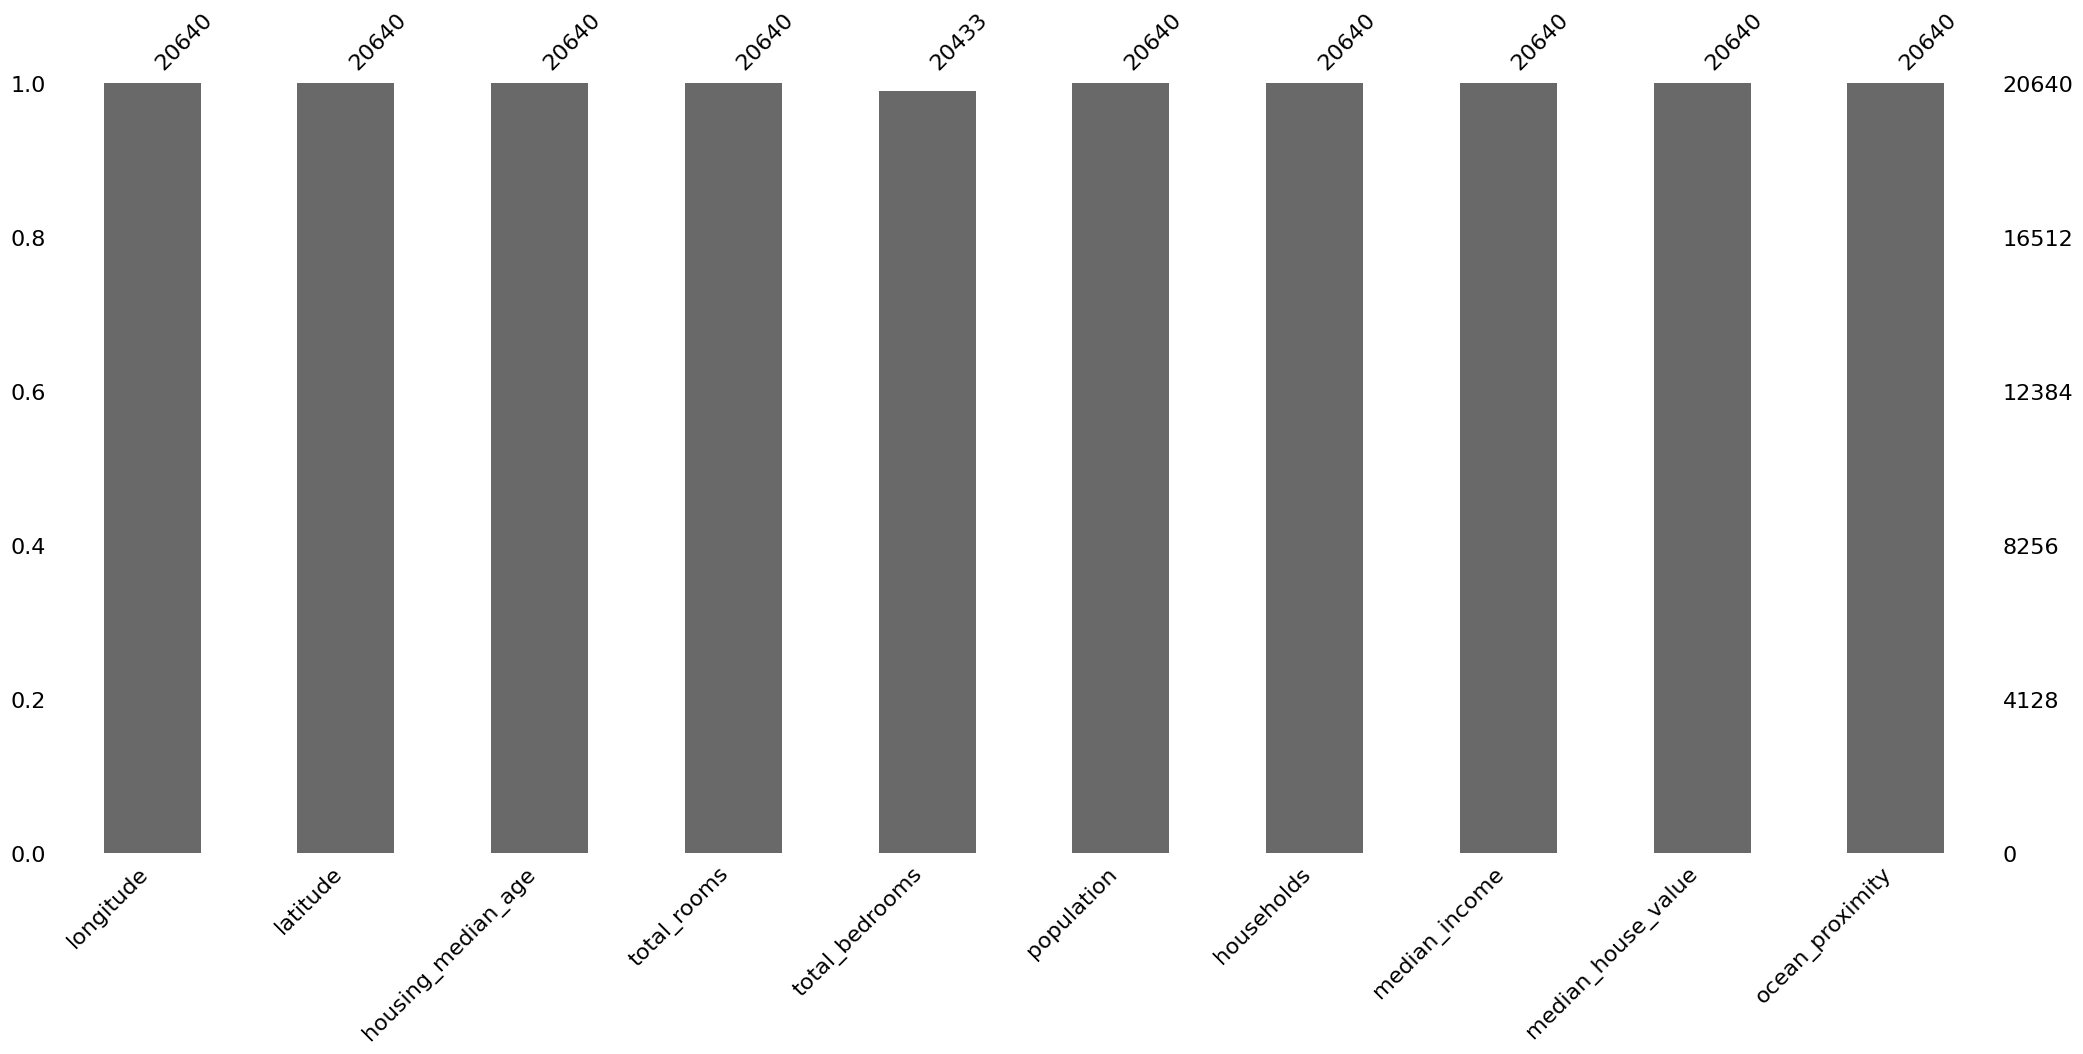

In [12]:
msno.bar(df)

In [13]:
df[df.isnull().any(axis=1)] 

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28                17.0       3051.0             NaN   

       population  households  median_income  median_house_value  \
290         570.0       218.0         4.3750            161900.0   
341         732.0       259.0         1.6196             85100.0   
538        3741.0      1273.0         2.5762            173400.0   
563         384.0       146.0         4.9489            247100.0   
696         387.0       161.0         3.9063            178400.0   
...           ...         ...            ...                 ...   
20267      3171.0       779.0         3.3409            220500.0   
20268      1938.0       762.0         1.6953            167400.0   
20372      1701.0       669.0         5.1033            410700.0   
20460      2734.0       814.0         6.6073            258100.0   
20484      1705.0       495.0         5.7376            218600.0   

      ocean_proximity  
290          NEAR BAY  
341          NEAR BAY  
538          NEAR BAY  
563          NEAR BAY  
696          NEAR BAY  
...               ...  
20267      NEAR OCEAN  
20268      NEAR OCEAN  
20372       <1H OCEAN  
20460       <1H OCEAN  
20484       <1H OCEAN  

[207 rows x 10 columns]

## **EDA**

In [14]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

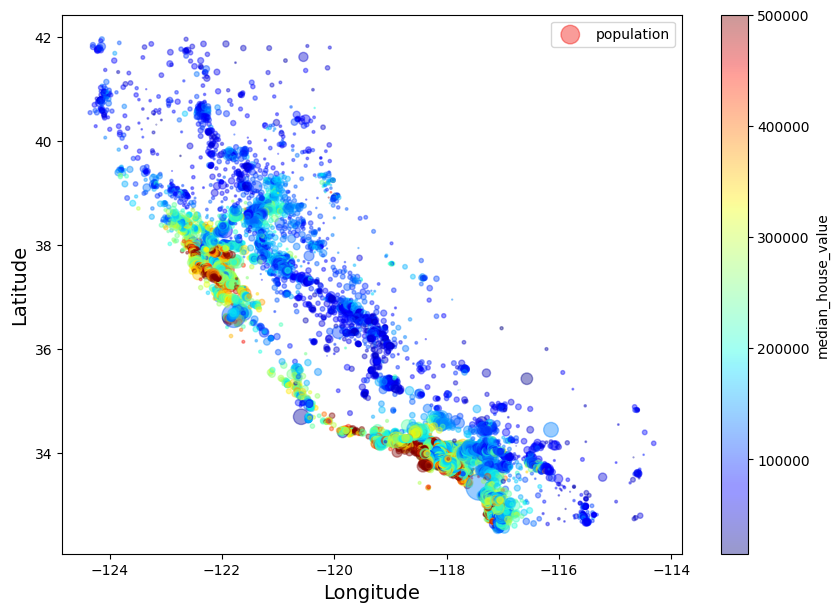

In [15]:
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.4,s=df['population']/100, label='population', figsize=(10,7),
				c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.legend() 
plt.show()

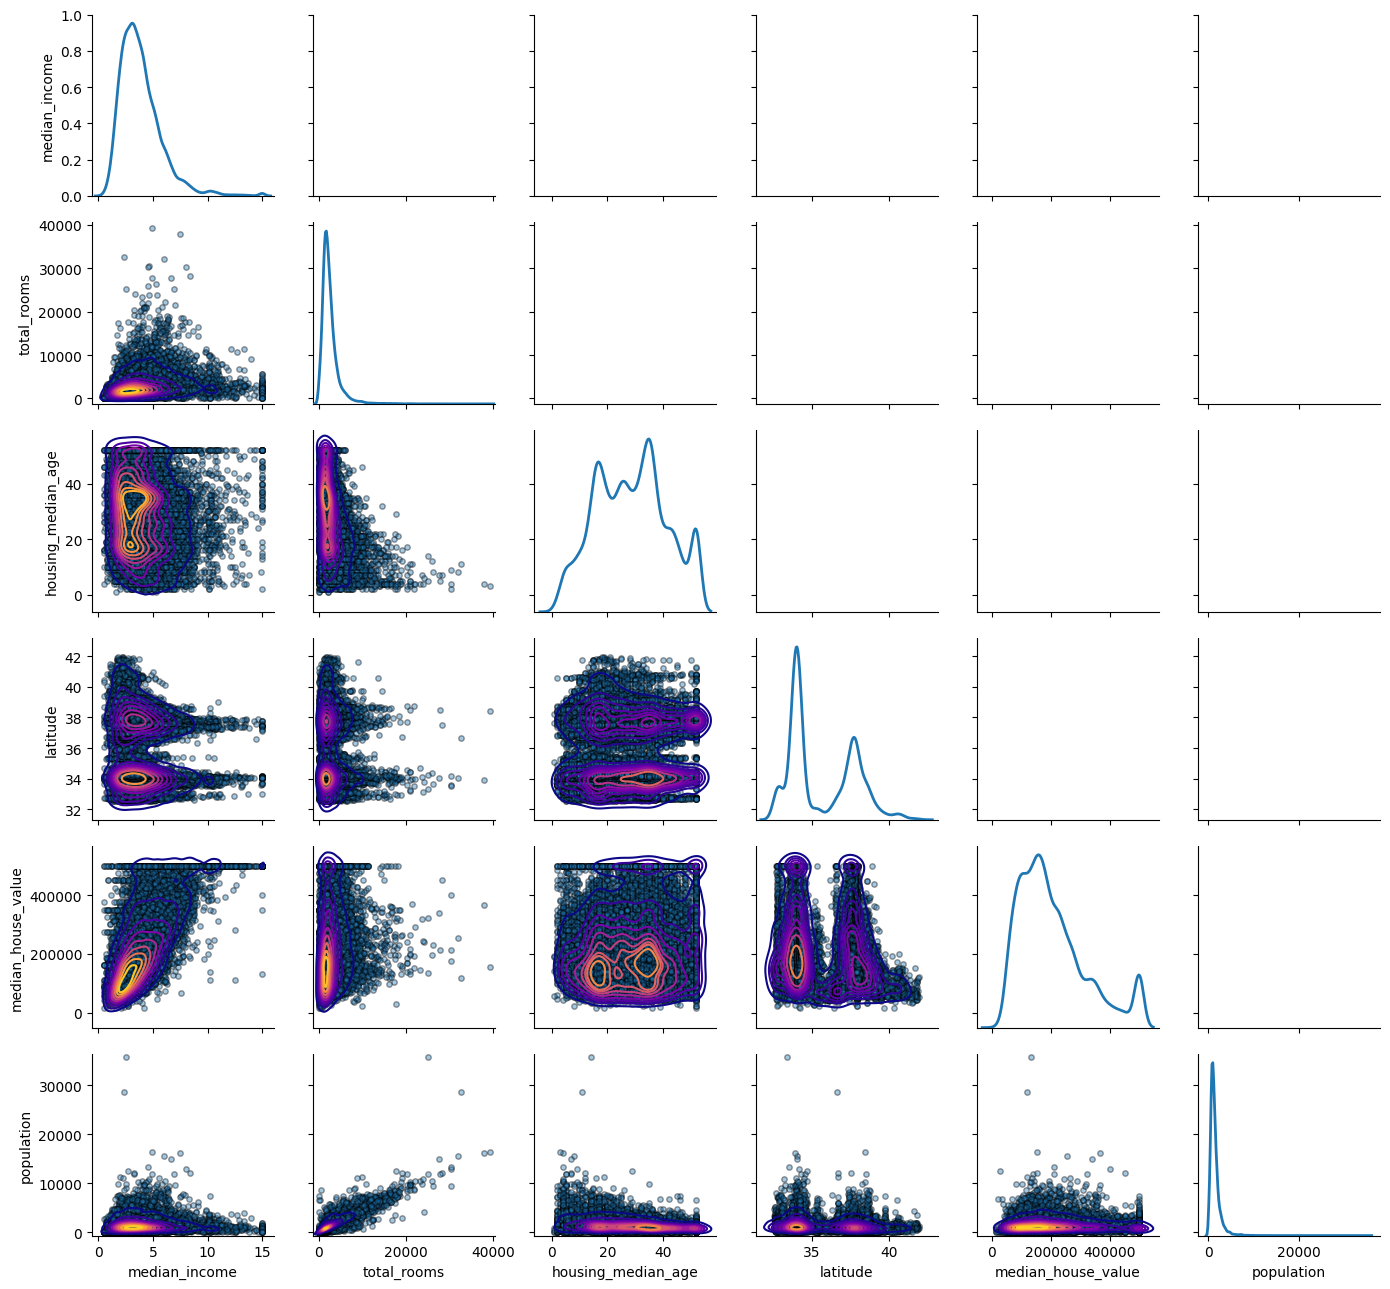

In [16]:
def snsPairGrid(df):

    ''' Plots a Seaborn Pairgrid w/ KDE & scatter plot of df features'''
    g = sns.PairGrid(df,diag_sharey=False)
    g.fig.set_size_inches(14,13)
    g.map_diag(sns.kdeplot, lw=2) # draw kde approximation on the diagonal
    g.map_lower(sns.scatterplot,s=15,edgecolor="k",linewidth=1,alpha=0.4) # scattered plot on lower half
    g.map_lower(sns.kdeplot,cmap='plasma',n_levels=10) # kde approximation on lower half
    plt.tight_layout()
    
snsPairGrid(df[['median_income','total_rooms','housing_median_age','latitude','median_house_value','population']])

In [17]:
num=df.select_dtypes(include='number').columns

In [18]:
df[num].corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.320451   -0.296244   -0.302916      -0.119034   
total_rooms               0.930380    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.877747    0.979728      -0.007723   
population                0.877747    1.000000    0.907222       0.004834   
households                0.979728    0.907222    1.000000       0.013033   
median_income            -0.007723    0.004834    0.013033       1.000000   
median_house_value        0.049686   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049686  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

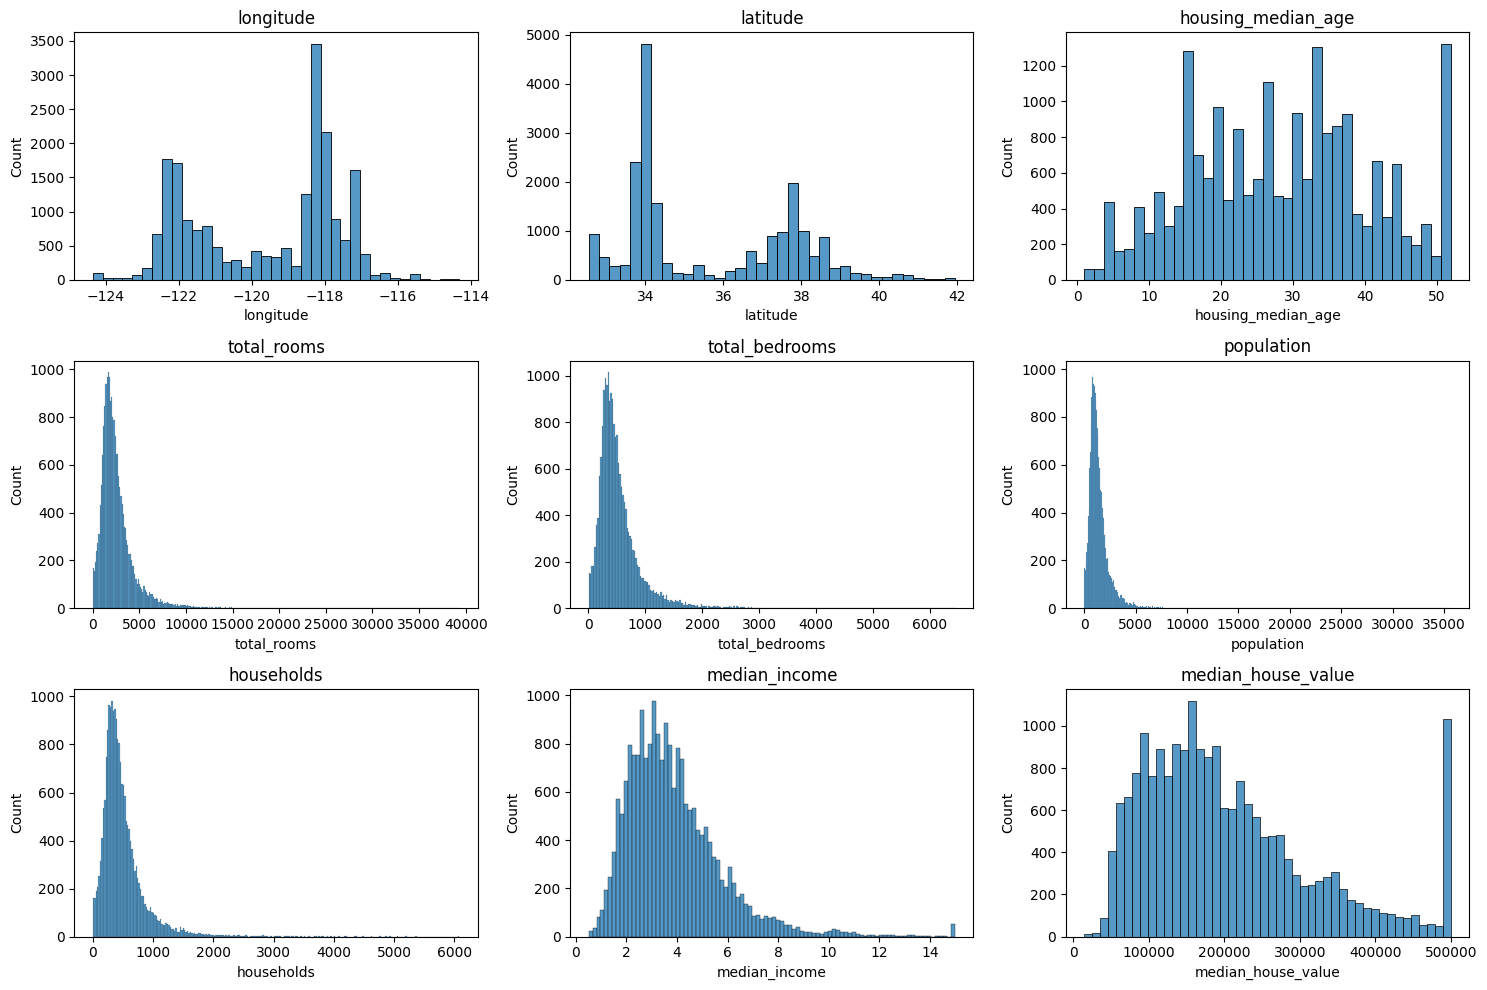

In [19]:
# Crear la figura y los ejes para 3 filas y 3 columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Ajusta el tamaño según tu necesidad
axes = axes.flatten()  # Para poder acceder a los ejes de forma lineal

# Graficar cada histograma en la cuadrícula
for i, column in enumerate(num):
    sns.histplot(data=df, x=column, ax=axes[i])  # Asignar cada gráfico a un subplot
    axes[i].set_title(column)  # Título para cada gráfico

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

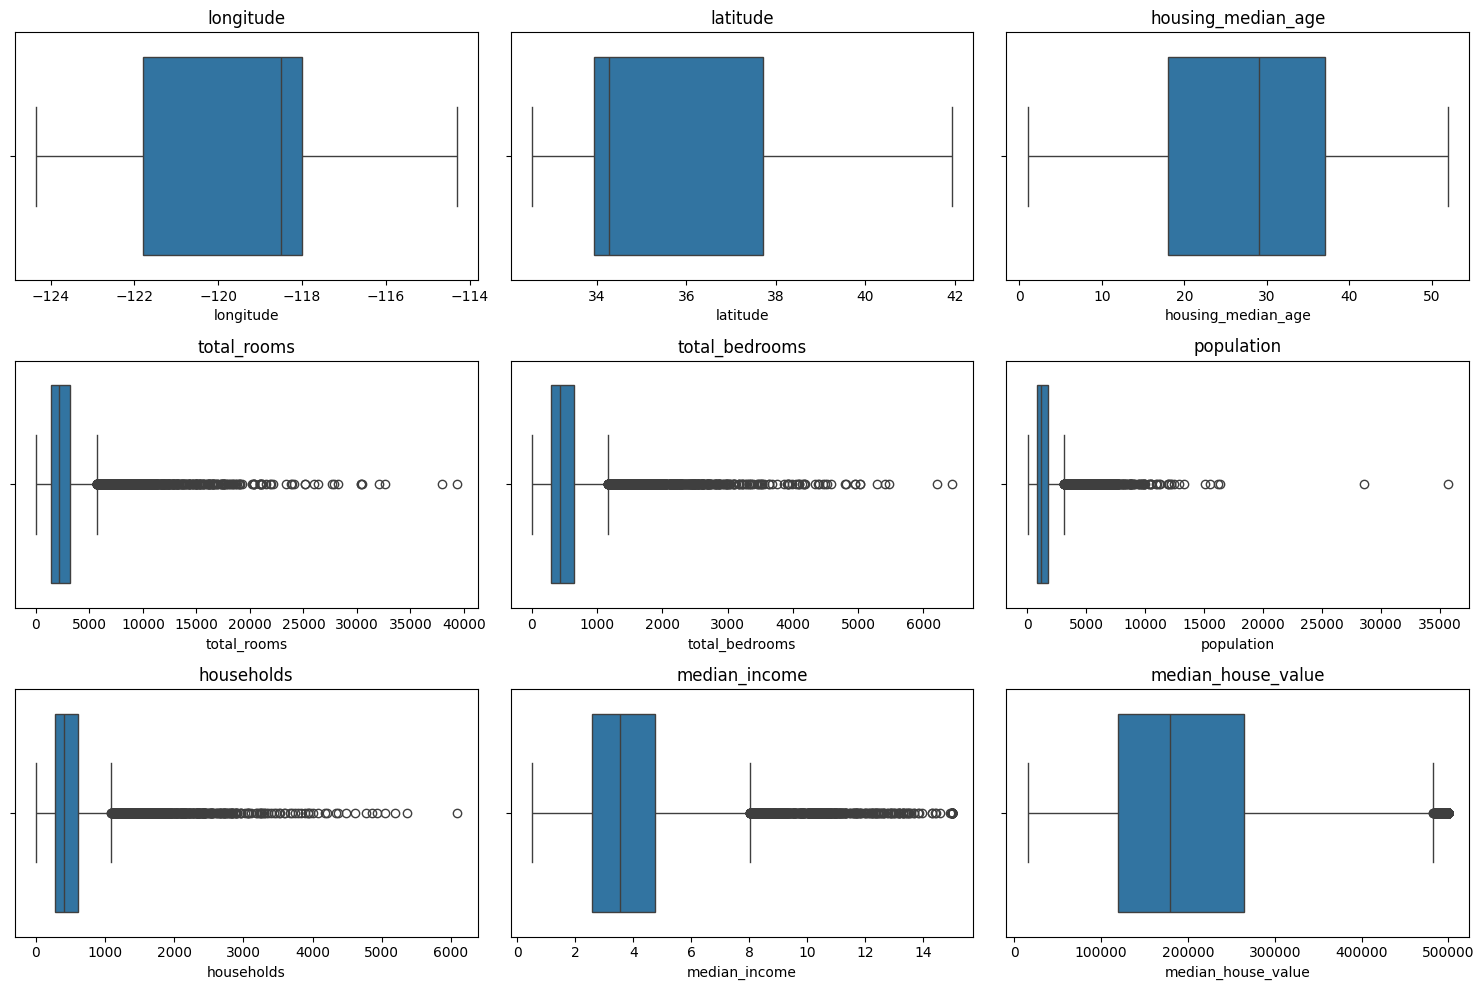

In [20]:
# Crear la figura y los ejes para 3 filas y 3 columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))  # Ajusta el tamaño según tu necesidad
axes = axes.flatten()  # Para poder acceder a los ejes de forma lineal

# Graficar cada histograma en la cuadrícula
for i, column in enumerate(num):
    sns.boxplot(data=df, x=column, ax=axes[i])  # Asignar cada gráfico a un subplot
    axes[i].set_title(column)  # Título para cada gráfico

# Ajustar el espaciado entre gráficos
plt.tight_layout()
plt.show()

In [21]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Crear un subplot de 3 filas y 3 columnas
fig = make_subplots(rows=3, cols=3, subplot_titles=num)

# Graficar cada histograma en su respectivo subplot
for i, column in enumerate(num):
    # Crear histograma con plotly express
    fig_hist = px.histogram(df, x=column)
    
    # Añadir la traza al subplot correspondiente
    row = (i // 3) + 1  # Calcular fila (división entera)
    col = (i % 3) + 1   # Calcular columna (resto de la división)
    for trace in fig_hist['data']:  # Extraer las trazas de la figura
        fig.add_trace(trace, row=row, col=col)

# Actualizar el layout para el tamaño de la figura y el título
fig.update_layout(height=800, width=800, showlegend=False, title_text="Histograms in 3x3 Grid")

# Mostrar el gráfico
fig.show()


In [22]:
df[num].describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [23]:
df.dropna(subset=['total_bedrooms'], inplace=True) # eliminar las columnas vacias de la columna total bedrooms

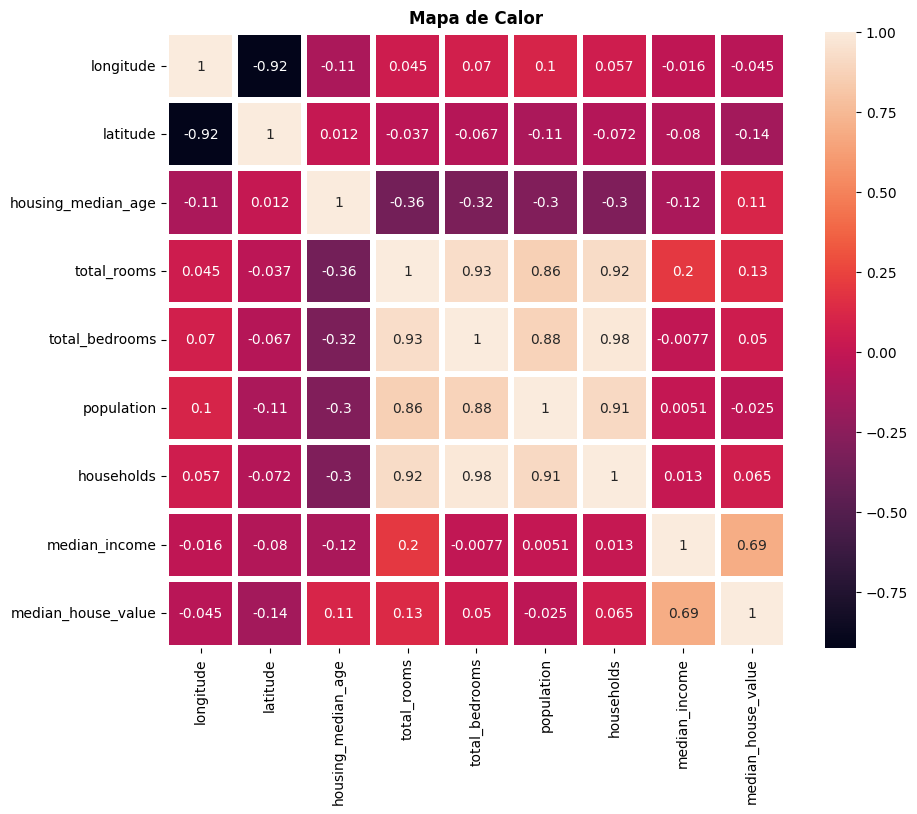

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num].corr(),annot=True,fmt='.2g',linewidths=3)
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

In [25]:
df_ocean=df.groupby('ocean_proximity',as_index=False)[['median_house_value','median_income']].sum()
df_ocean=pd.DataFrame(df_ocean)
df_ocean

ocean_proximity  median_house_value  median_income
0       <1H OCEAN        2.170581e+09     38223.7621
1          INLAND        8.113300e+08     20854.4902
2          ISLAND        1.902200e+06        13.7221
3        NEAR BAY        5.885640e+08      9478.7185
4      NEAR OCEAN        6.544833e+08     10528.7521

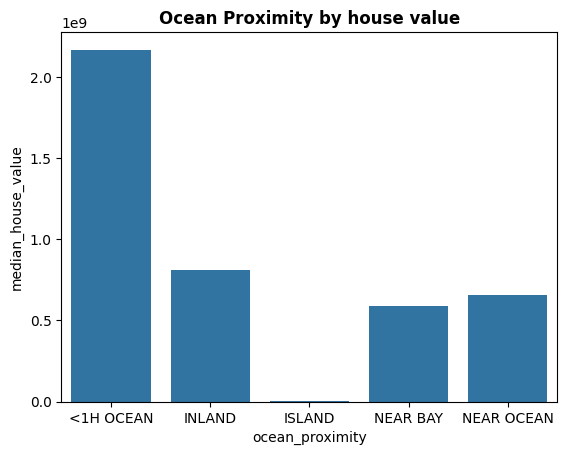

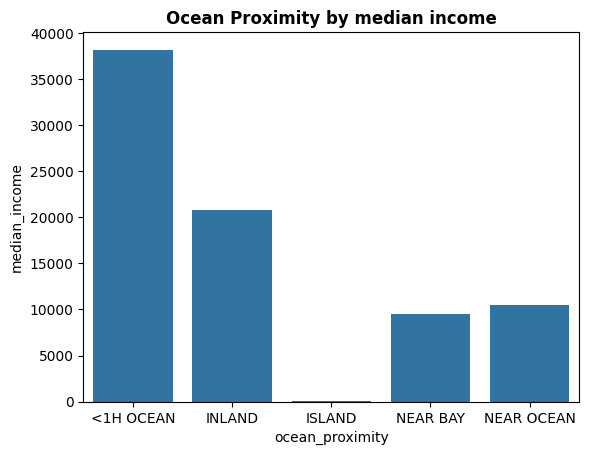

In [26]:
sns.barplot(data=df_ocean,x='ocean_proximity',y='median_house_value')
plt.title('Ocean Proximity by house value',fontsize=12,weight='bold')
plt.show()

sns.barplot(data=df_ocean,x='ocean_proximity',y='median_income')
plt.title('Ocean Proximity by median income',fontsize=12,weight='bold')
plt.show()

In [27]:
le=LabelEncoder()
df['ocean_proximity_encoded']=le.fit_transform(df['ocean_proximity'])
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
4       565.0       259.0         3.8462            342200.0        NEAR BAY   

   ocean_proximity_encoded  
0                        3  
1                        3  
2                        3  
3                        3  
4                        3

In [28]:
df.drop(columns=['ocean_proximity'],inplace=True)

In [29]:
cols1=['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

In [30]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df[cols1])
df_scaled=pd.DataFrame(df_scaled, columns=cols1)
df_scaled['ocean_proximity_encoded']=df['ocean_proximity_encoded']
df_scaled.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327314  1.051717            0.982163    -0.803813       -0.970325   
1  -1.322323  1.042355           -0.606210     2.042130        1.348276   
2  -1.332305  1.037674            1.855769    -0.535189       -0.825561   
3  -1.337296  1.037674            1.855769    -0.623510       -0.718768   
4  -1.337296  1.037674            1.855769    -0.461970       -0.611974   

   population  households  median_income  median_house_value  \
0   -0.973320   -0.976833       2.345163            2.128819   
1    0.861339    1.670373       2.332632            1.313626   
2   -0.819769   -0.843427       1.782939            1.258183   
3   -0.765056   -0.733562       0.932970            1.164622   
4   -0.758879   -0.628930      -0.013143            1.172418   

   ocean_proximity_encoded  
0                      3.0  
1                      3.0  
2                      3.0  
3                      3.0  
4                      3.0

## **Split Data Target & Features**

In [31]:
X=df_scaled.drop('median_house_value',axis=1)
y=df_scaled['median_house_value']

## **Split Train & Test data**

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100,shuffle=True)

In [43]:
rf=RandomForestRegressor()
xgb = XGBRegressor()
columns=['RandomForestRegressor','AdaBoostRegressor']
train_score=[]
rec_score=[]
mae_val=[]
mse_val=[]

def all(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    accuracy_train=model.score(x_train,y_train)*100
    recall_result=r2_score(y_pred,y_test)*100
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    train_score.append(accuracy_train)
    rec_score.append(recall_result)
    mse_val.append(mse)
    mae_val.append(mae)
    print('Accuracy after train the model is :',accuracy_train)
    print('Result recall score is :',recall_result)
    
    print('Mean Squared Error :' , mse.round(2)*100)
    print('Mean Absolute Error :',mae.round(2)*100)

In [57]:
all(rf)

Accuracy after train the model is : 97.3331339368755
Result recall score is : 75.00787385381707
Mean Squared Error : 19.0
Mean Absolute Error : 28.000000000000004


In [44]:
all(xgb)

Accuracy after train the model is : 93.76840852391639
Result recall score is : 79.00467769504752
Mean Squared Error : 18.0
Mean Absolute Error : 28.000000000000004


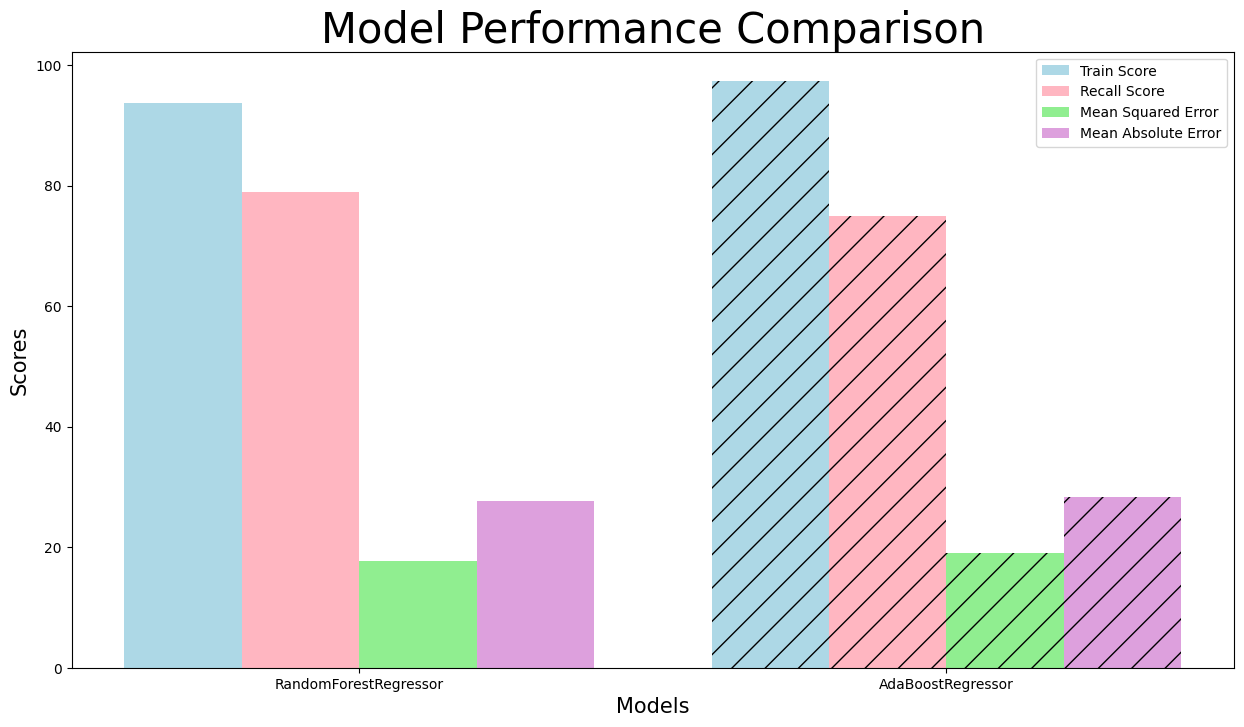

In [62]:
n_bars = len(columns)
bar_width = 0.2
xpos = np.arange(n_bars)

# Scaling factors
mse_val_scaled=[x*100 for x in mse_val]
mae_val_scaled = [x*100 for x in mae_val]

plt.figure(figsize=(15, 8))

bars1 = plt.bar(xpos - 1.5 * bar_width, train_score, width=bar_width, label="Train Score", color='lightblue')
bars2 = plt.bar(xpos - 0.5 * bar_width, rec_score, width=bar_width, label="Recall Score", color='lightpink')

bars3 = plt.bar(xpos + 0.5 * bar_width, mse_val_scaled, width=bar_width, label="Mean Squared Error", color='lightgreen')
bars4 = plt.bar(xpos + 1.5 * bar_width, mae_val_scaled, width=bar_width, label="Mean Absolute Error", color='plum')

bars1[1].set_hatch('/')
bars2[1].set_hatch('/')
bars3[1].set_hatch('/')
bars4[1].set_hatch('/')

plt.xticks(xpos, columns)
plt.xlabel("Models", fontsize=15)
plt.ylabel("Scores", fontsize=15)
plt.title("Model Performance Comparison", fontsize=30)
plt.legend()

plt.show()